In [29]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

# Load CSVs
age_df_2016 = pd.read_csv("Output/age_data_2016.csv")

ethnicity_df_2016 = pd.read_csv("Output/ethnicity_data_2016.csv")

mls_attendance = pd.read_csv("Resources/MLS_2017_Attendance.csv")

# Other CSVs

age_df_total = pd.read_csv("Output/Age_Data.csv")

eth_df_total = pd.read_csv("Output/Ethnicity_Data.csv")

mls_att_total = pd.read_csv("Resources/MLS_Hist_Att.csv")


In [30]:
# Clean the data frames

age_df = age_df_2016.loc[:, ["City & State","Total Population","Age 18 to 29","Age 30 to 44"]]

ethnicity_df = ethnicity_df_2016.loc[:, ["City & State","Total Population","White","Black/Afro-American","Latino","Asian"]]


In [31]:
mls_attendance = mls_attendance.dropna()

mls_attendance = mls_attendance.loc[:,["Team","Average"]]

mls_attendance

,Team,Average
0,Atlanta United FC,48200
1,Seattle Sounders,43666
3,Orlando City,25028
4,New York City FC,22321
5,Los Angeles Galaxy,22246
7,New York Red Bulls,21175
8,Portland Timbers,21144
9,Minnesota United FC,20538
11,San Jose Earthquakes,19875
12,Sporting Kansas City,19537


In [32]:
# Create column to hold percentile calculation for first age group and format it
age_df["Age % 18 to 29"] = age_df["Age 18 to 29"] / age_df["Total Population"] * 100
#age_df["Age % 18 to 29"] = age_df["Age % 18 to 29"].map("{:.1f}".format)

# Create column to hold percentile calculation for second age group and format it
age_df["Age % 30 to 44"] = age_df["Age 30 to 44"] / age_df["Total Population"] * 100
#age_df["Age % 30 to 44"] = age_df["Age % 30 to 44"].map("{:.1f}".format)

age_df

,City & State,Total Population,Age 18 to 29,Age 30 to 44,Age % 18 to 29,Age % 30 to 44
0,"Atlanta city, Georgia",456378,111563,109761,24.445306,24.050458
1,"Seattle city, Washington",668849,153546,174781,22.956751,26.131608
2,"Orlando city, Florida",263306,57282,64564,21.754916,24.520520
3,"New York city, New York",8461961,1598367,1890517,18.888849,22.341358
4,"Carson city, California",92780,16827,17290,18.136452,18.635482
5,"Newark city, New Jersey",280139,56080,62773,20.018634,22.407805
6,"Portland city, Oregon",620589,112933,165930,18.197712,26.737503
7,"Minneapolis city, Minnesota",404670,105223,94989,26.002175,23.473200
8,"San Jose city, California",1009363,171082,228996,16.949502,22.687180
9,"Kansas City city, Kansas",149755,25039,30355,16.719976,20.269774


In [33]:
# Create percentage calculations for ethnicity
ethnicity_df["White Percentage"] = ethnicity_df["White"] / ethnicity_df["Total Population"] * 100
ethnicity_df["Black Percentage"] = ethnicity_df["Black/Afro-American"] / ethnicity_df["Total Population"] * 100
ethnicity_df["Latino Percentage"] = ethnicity_df["Latino"] / ethnicity_df["Total Population"] * 100
ethnicity_df["Asian Percentage"] = ethnicity_df["Asian"] / ethnicity_df["Total Population"] * 100

# Format new columns
#ethnicity_df["White Percentage"] = ethnicity_df["White Percentage"].map("{:.1f}".format)
#ethnicity_df["Black Percentage"] = ethnicity_df["Black Percentage"].map("{:.1f}".format)
#ethnicity_df["Latino Percentage"] = ethnicity_df["Latino Percentage"].map("{:.1f}".format)
#ethnicity_df["Asian Percentage"] = ethnicity_df["Asian Percentage"].map("{:.1f}".format)

ethnicity_df


,City & State,Total Population,White,Black/Afro-American,Latino,Asian,White Percentage,Black Percentage,Latino Percentage,Asian Percentage
0,"Atlanta city, Georgia",456378,182794,239005,21838,18235,40.053202,52.369965,4.785069,3.995591
1,"Seattle city, Washington",668849,462673,47493,43868,94619,69.174507,7.100706,6.558730,14.146541
2,"Orlando city, Florida",263306,160607,69572,77009,10109,60.996331,26.422489,29.246960,3.839259
3,"New York city, New York",8461961,3644982,2064927,2457945,1159883,43.074909,24.402464,29.046990,13.707024
4,"Carson city, California",92780,27282,19830,37011,23963,29.405044,21.373141,39.891140,25.827765
5,"Newark city, New Jersey",280139,68226,140750,100950,4914,24.354338,50.242915,36.035682,1.754129
6,"Portland city, Oregon",620589,482410,35465,60040,47045,77.734217,5.714732,9.674680,7.580702
7,"Minneapolis city, Minnesota",404670,262130,76070,38832,23911,64.776237,18.798033,9.595967,5.908765
8,"San Jose city, California",1009363,425883,31096,329135,344188,42.193245,3.080755,32.608190,34.099526
9,"Kansas City city, Kansas",149755,88953,37530,43727,5786,59.399018,25.060933,29.199025,3.863644


<Figure size 1440x360 with 0 Axes>

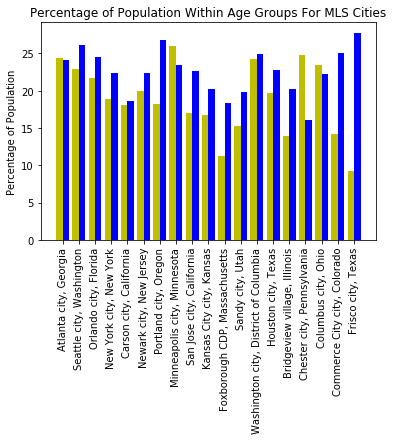

In [34]:
# Create bar chart for age to show categorical percentages between cities

ind = np.arange(len(age_df))
width = 0.4
tick_locations = [value+0.4 for value in ind]

plt.figure(figsize=(20,5))
fig, ax = plt.subplots()

age1829 = ax.bar(ind,age_df["Age % 18 to 29"], width, color='y', align='edge')
age3044 = ax.bar(ind + width,age_df["Age % 30 to 44"], width, color='b', align='edge')

plt.ylabel('Percentage of Population')
plt.title('Percentage of Population Within Age Groups For MLS Cities')
plt.xticks(tick_locations, age_df["City & State"], rotation='vertical')

plt.show()


In [35]:
(slope, intercept, r_value, _, _) = linregress(age_df["Age % 18 to 29"], mls_attendance["Average"])
fit = slope * age_df["Age % 18 to 29"] + intercept

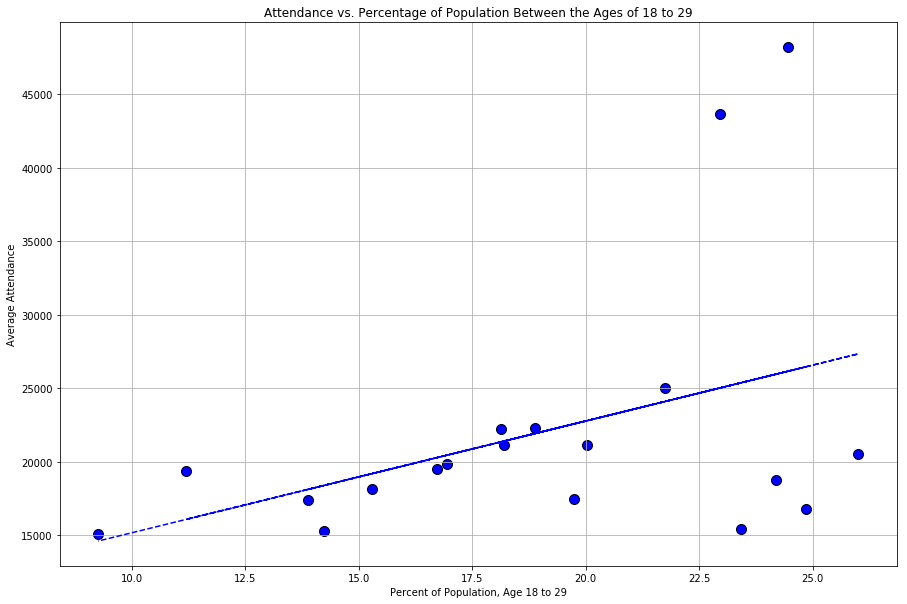

In [36]:
# Age scatter plot

plt.figure(figsize=(15,10))
plt.scatter(age_df["Age % 18 to 29"], mls_attendance["Average"], marker='o',s=100,facecolors='b',edgecolors='black')

plt.title("Attendance vs. Percentage of Population Between the Ages of 18 to 29")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of Population, Age 18 to 29")
plt.grid()

plt.plot(age_df["Age % 18 to 29"],fit,'b--')

plt.savefig("Output/Age18to29.png")

plt.show()

In [37]:
(t_stat, p) = stats.ttest_ind(age_df["Age % 18 to 29"], mls_attendance["Average"], equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))
print(f"r-squared value is {r_value**2}")

t-statistics is -10.797172655907735.
p-value is 2.7090226886010593e-09.
r-squared value is 0.1686528097528695


In [11]:
# Regression for age scatter plot 2

(slope, intercept, r_value, _, _) = linregress(age_df["Age % 30 to 44"], mls_attendance["Average"])
fit = slope * age_df["Age % 30 to 44"] + intercept

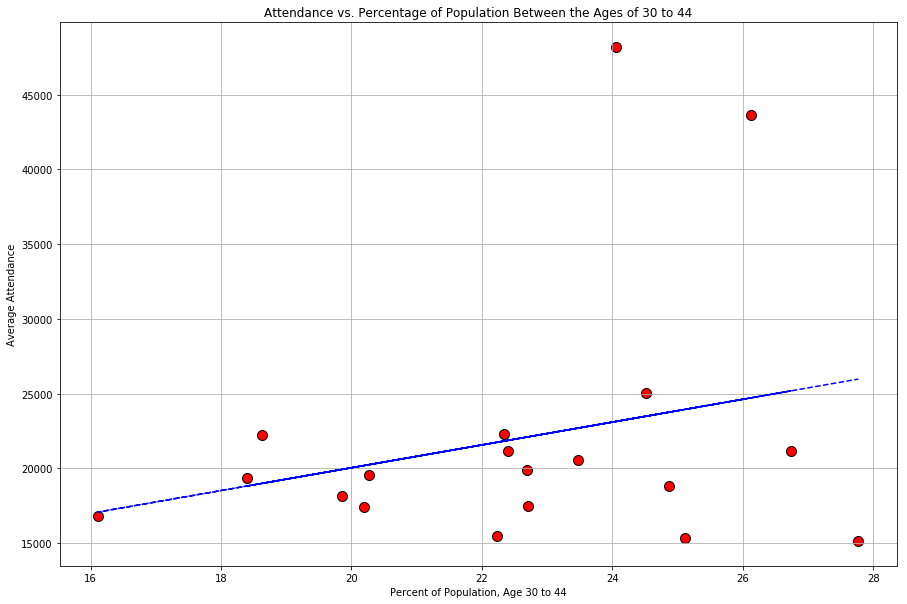

In [12]:
# Age scatter plot 2

plt.figure(figsize=(15,10))
plt.scatter(age_df["Age % 30 to 44"], mls_attendance["Average"], marker='o',s=100,facecolors='r',edgecolors='black')

plt.title("Attendance vs. Percentage of Population Between the Ages of 30 to 44")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of Population, Age 30 to 44")
plt.grid()

plt.plot(age_df["Age % 30 to 44"],fit,'b--')

plt.savefig("Output/Age30to44.png")

plt.show()

In [14]:
# T-Test & r-squared values for above graph
(t_stat, p) = stats.ttest_ind(age_df["Age % 30 to 44"], mls_attendance["Average"], equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))
print(f"r-squared value is {r_value**2}")

t-statistics is -10.795405044059862.
p-value is 2.716010045226601e-09.
r-squared value is 0.06956326398880378


In [39]:
# Ethnicity (white) regression
(slope, intercept, r_value, _, _) = linregress(ethnicity_df["White Percentage"], mls_attendance["Average"])
fit = slope * ethnicity_df["White Percentage"] + intercept

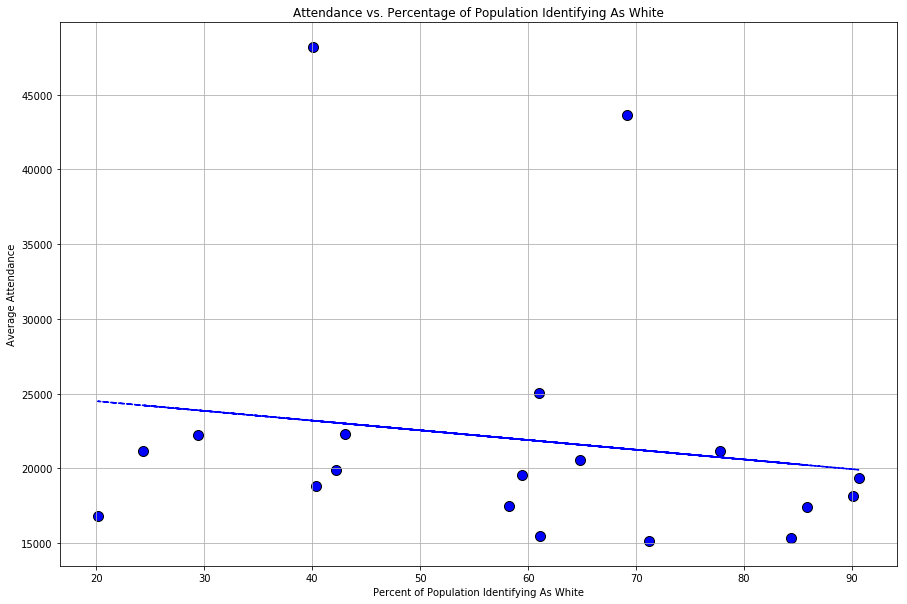

In [41]:
# Ethnicity (white) scatter plot

plt.figure(figsize=(15,10))
plt.scatter(ethnicity_df["White Percentage"], mls_attendance["Average"], marker='o',s=100,facecolors='b',edgecolors='black')

plt.title("Attendance vs. Percentage of Population Identifying As White")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of Population Identifying As White")
plt.grid()

plt.plot(ethnicity_df["White Percentage"],fit,'b--')

plt.savefig("Output/EthnicityWhite.png")

plt.show()

In [43]:
# T-Test & r-squared values for above graph
(t_stat, p) = stats.ttest_ind(ethnicity_df["White Percentage"], mls_attendance["Average"], equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))
print(f"r-squared value is {r_value**2}")

t-statistics is -10.777655975880991.
p-value is 2.7867599715381217e-09.
r-squared value is 0.0263152834810409


In [45]:
# Ethnicity (black) regression
(slope, intercept, r_value, _, _) = linregress(ethnicity_df["Black Percentage"], mls_attendance["Average"])
fit = slope * ethnicity_df["Black Percentage"] + intercept

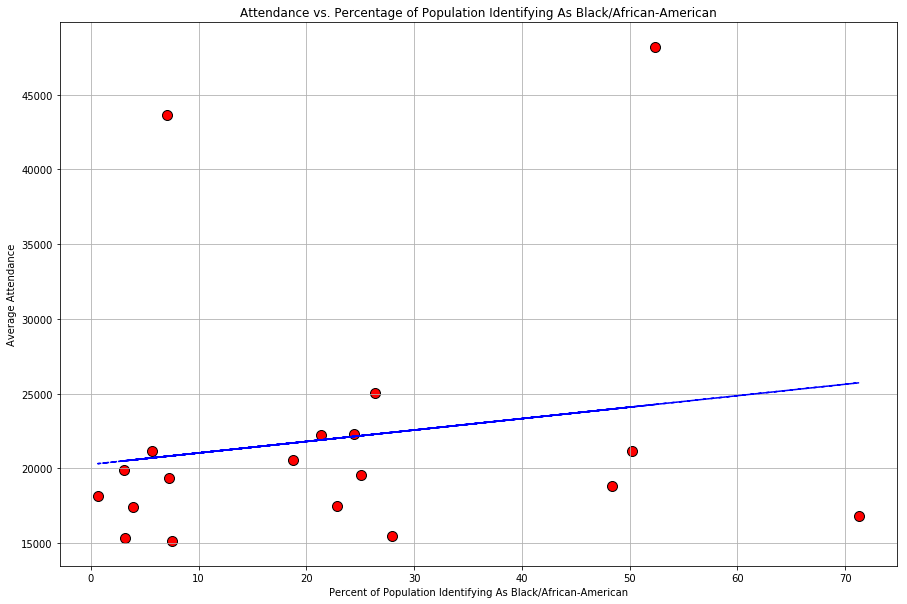

In [46]:
# Ethnicity (black) scatter plot

plt.figure(figsize=(15,10))
plt.scatter(ethnicity_df["Black Percentage"], mls_attendance["Average"], marker='o',s=100,facecolors='r',edgecolors='black')

plt.title("Attendance vs. Percentage of Population Identifying As Black/African-American")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of Population Identifying As Black/African-American")
plt.grid()

plt.plot(ethnicity_df["Black Percentage"],fit,'b--')

plt.savefig("Output/EthnicityBlack.png")

plt.show()

In [47]:
# T-Test & r-squared values for above graph
(t_stat, p) = stats.ttest_ind(ethnicity_df["Black Percentage"], mls_attendance["Average"], equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))
print(f"r-squared value is {r_value**2}")

t-statistics is -10.795401087368509.
p-value is 2.7157310336839935e-09.
r-squared value is 0.030378696850130026


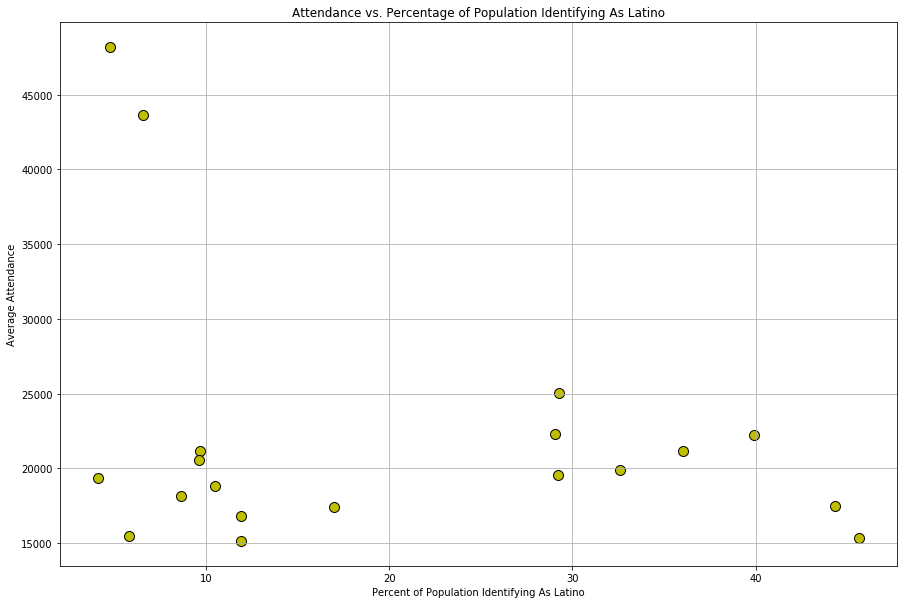

In [27]:
# Ethnicity (latino) scatter plot

plt.figure(figsize=(15,10))
plt.scatter(ethnicity_df["Latino Percentage"], mls_attendance["Average"], marker='o',s=100,facecolors='y',edgecolors='black')

plt.title("Attendance vs. Percentage of Population Identifying As Latino")
plt.ylabel("Average Attendance")
plt.xlabel("Percent of Population Identifying As Latino")
plt.grid()

plt.savefig("Output/EthnicityLatino.png")

plt.show()